# (Ford GoBike 2019-12 Data)
## by (Mohannad Alnahhas)

## Preliminary Wrangling

> The Data set is gathered from [Ford Gobike](https://s3.amazonaws.com/baywheels-data/index.html) website. The data has information of bike rider renters. Its features are rent duration, start destination, end destination, user type, bike id, longitude and latitude, and rental method. The website provide history of data. Unfortunately, most features of the data are categorical. Thus, I may not have a chance to inspect 2 quantitative variables. I have chosen to analyze and inspect 2019-12 data. In this report I will inspect the data and visualize the outcomes. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile as zf
import glob
import os
import io
import requests

%matplotlib inline

In [2]:
#Since github upload size limit is 25MB
# I will scrape the data directly from the website
response= requests.get('https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip', stream= True)
print(response)

with zf.ZipFile(io.BytesIO(response.content)) as myzip:
    myzip.extractall() #After running this code, you'll find 1 folder and 1 csv file
    # If you are using windows, you can delete the folder, but don't change the csv file name.

<Response [200]>


In [3]:
df= pd.read_csv('201912-baywheels-tripdata.csv') # Read the file

C:\Users\mohan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df 

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,66600,2019-12-31 14:28:50.2860,2020-01-01 08:58:51.2500,364.0,China Basin St at 3rd St,37.772000,-122.389970,349.0,Howard St at Mary St,37.781010,-122.405666,12085,Customer,NaN
1,36526,2019-12-31 21:52:47.7620,2020-01-01 08:01:33.9320,38.0,The Embarcadero at Pier 38,37.782926,-122.387921,410.0,Illinois St at Cesar Chavez St,37.750200,-122.386567,9477,Customer,NaN
2,8164,2019-12-31 23:50:04.8770,2020-01-01 02:06:09.4140,14.0,Clay St at Battery St,37.795001,-122.399970,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,10420,Customer,NaN
3,8163,2019-12-31 23:49:21.4000,2020-01-01 02:05:24.6670,14.0,Clay St at Battery St,37.795001,-122.399970,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,2065,Customer,NaN
4,6847,2019-12-31 22:51:05.6850,2020-01-01 00:45:13.4860,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,10219,Customer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150097,731,2019-12-28 18:37:29,2019-12-28 18:49:40,NaN,NaN,37.809731,-122.409855,NaN,NaN,37.807573,-122.421681,719651,Subscriber,app
150098,748,2019-12-28 18:37:24,2019-12-28 18:49:53,NaN,NaN,37.809768,-122.409797,NaN,NaN,37.807558,-122.421638,655411,Subscriber,app
150099,1044,2019-12-26 14:25:37,2019-12-26 14:43:02,NaN,NaN,37.810183,-122.410271,NaN,NaN,37.807225,-122.408850,936881,Subscriber,app
150100,326,2019-12-30 20:35:43,2019-12-30 20:41:09,NaN,NaN,37.810471,-122.417386,NaN,NaN,37.803143,-122.414373,397539,Subscriber,app


## Data Wrangling

### Creating duration in minutes instead of seconds
Because it is easier for us to understand the unit minutes than seconds

In [5]:
minutes= df['duration_sec']/60
minutes= minutes.round()
minutes= minutes.astype(int)

df.insert(1, 'duration_min', minutes)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150102 entries, 0 to 150101
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             150102 non-null  int64  
 1   duration_min             150102 non-null  int32  
 2   start_time               150102 non-null  object 
 3   end_time                 150102 non-null  object 
 4   start_station_id         129083 non-null  float64
 5   start_station_name       129087 non-null  object 
 6   start_station_latitude   150102 non-null  float64
 7   start_station_longitude  150102 non-null  float64
 8   end_station_id           128755 non-null  float64
 9   end_station_name         128757 non-null  object 
 10  end_station_latitude     150102 non-null  float64
 11  end_station_longitude    150102 non-null  float64
 12  bike_id                  150102 non-null  int64  
 13  user_type                150102 non-null  object 
 14  rent

### Splitting timestamp (start_time, end_time columns) to (start_date, start_time, end_date, end_time)

In [7]:
df.start_time= pd.to_datetime(df.start_time)
df.end_time= pd.to_datetime(df.end_time)

In [8]:
df.start_time= df.start_time.dt.round('T')
df.end_time= df.end_time.dt.round('T')

In [9]:
df.insert(2, 'start_date', df.start_time.dt.date)
df.start_time= df.start_time.dt.time

In [10]:
df.insert(4, 'end_date', df.end_time.dt.date)

In [11]:
df.end_time= df.end_time.dt.time

In [12]:
df.sample(1)

,duration_sec,duration_min,start_date,start_time,end_date,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
76181,157,3,2019-12-10,10:33:00,2019-12-10,10:36:00,380.0,Masonic Ave at Turk St,37.779047,-122.447291,375.0,Grove St at Masonic Ave,37.774836,-122.446546,12943,Customer,NaN


In [13]:
df.columns

Index(['duration_sec', 'duration_min', 'start_date', 'start_time', 'end_date',
       'end_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'bike_id', 'user_type', 'rental_access_method'],
      dtype='object')

### Deleting unnessecery columns

In [14]:
df.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'duration_sec', 'start_station_name', 'end_station_name'], inplace= True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150102 entries, 0 to 150101
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   duration_min          150102 non-null  int32  
 1   start_date            150102 non-null  object 
 2   start_time            150102 non-null  object 
 3   end_date              150102 non-null  object 
 4   end_time              150102 non-null  object 
 5   start_station_id      129083 non-null  float64
 6   end_station_id        128755 non-null  float64
 7   bike_id               150102 non-null  int64  
 8   user_type             150102 non-null  object 
 9   rental_access_method  27681 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 10.9+ MB


### Changing the data type of some columns

In [16]:
df.start_station_id= df.start_station_id.astype(str) #start_station_id to type string
df.end_station_id= df.end_station_id.astype(str) #end_station_id to type string
df.bike_id.astype(str) #bike_id type to string

df.start_station_id= df.start_station_id.str.replace('.0', '') #deleting floating point (it doesn't mean anything)
df.end_station_id= df.end_station_id.str.replace('.0', '') #deleting floating point (it doesn't mean anything)

### Adding columns for weekday, and day
A little search on the internet about street names, will indicate that the bike riders are in USA San Francisco. A little search on time table of San Francisco also will result that their weekend days are Saturday and Sunday. Combining the infromation gathered, can construct two new columns. Column weekday, to indicate whether weekend or weekday. While column day, indicate the day of the week (from Monday to Sunday).

In [17]:
df['weekday']= np.where(pd.to_datetime(df['start_date']).dt.dayofweek < 5,'weekday','weekend') #column weekday

df['day']= pd.to_datetime(df.start_date).dt.dayofweek.astype(str) #column day (will output 0,1,2,3...7)

days= ['mon', 'tue', 'wed', 'thu','fri', 'sat', 'sun'] #list of days

for index in range(7):
    df['day']= df.day.replace(str(index), days[index]) #decoding the numeric value to actual day

### Counting missing values

In [18]:
df.isna().sum()

duration_min                 0
start_date                   0
start_time                   0
end_date                     0
end_time                     0
start_station_id             0
end_station_id               0
bike_id                      0
user_type                    0
rental_access_method    122421
weekday                      0
day                          0
dtype: int64

In [19]:
df

,duration_min,start_date,start_time,end_date,end_time,start_station_id,end_station_id,bike_id,user_type,rental_access_method,weekday,day
0,1110,2019-12-31,14:29:00,2020-01-01,08:59:00,364,349,12085,Customer,NaN,weekday,tue
1,609,2019-12-31,21:53:00,2020-01-01,08:02:00,38,4,9477,Customer,NaN,weekday,tue
2,136,2019-12-31,23:50:00,2020-01-01,02:06:00,14,6,10420,Customer,NaN,weekday,tue
3,136,2019-12-31,23:49:00,2020-01-01,02:05:00,14,6,2065,Customer,NaN,weekday,tue
4,114,2019-12-31,22:51:00,2020-01-01,00:45:00,3,363,10219,Customer,NaN,weekday,tue
...,...,...,...,...,...,...,...,...,...,...,...,...
150097,12,2019-12-28,18:37:00,2019-12-28,18:50:00,nan,nan,719651,Subscriber,app,weekend,sat
150098,12,2019-12-28,18:37:00,2019-12-28,18:50:00,nan,nan,655411,Subscriber,app,weekend,sat
150099,17,2019-12-26,14:26:00,2019-12-26,14:43:00,nan,nan,936881,Subscriber,app,weekday,thu
150100,5,2019-12-30,20:36:00,2019-12-30,20:41:00,nan,nan,397539,Subscriber,app,weekday,mon


### What is the structure of your dataset?

> We have 150,102 bike riders in 2019-12. The data provides 13 features (duration_min is based on duration_sec). Most of the data is string. I have dropped latitude and longitude columns, because I won't use them in the anaysis.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in the features that will help me predict the behaviour of bike rideres depending on their user_type. And to predict the number of riders on weekdays.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Im most interested in duration_min,  user_type, and day. In general, I would like to see whether there is a relationship between these features.

## Univariate Exploration


### Bike riders user type

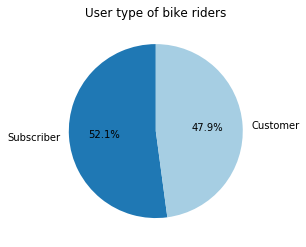

In [20]:
user_types_counts= df.user_type.value_counts()
plt.pie(user_types_counts,
        labels= user_types_counts.index,
        startangle= 90, autopct='%1.1f%%',
        colors= [sb.color_palette('Paired')[1],sb.color_palette('Paired')[0]]);
plt.title('User type of bike riders');

> It seems that there isn't much difference in user type. However, our bike riders are 52% subscribers. On the other hand, 48% are customers.

### Time line of start_date, End_date

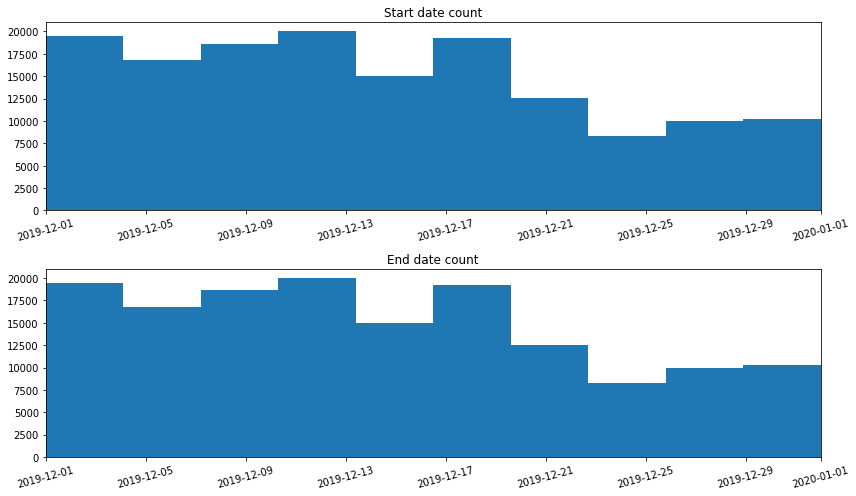

In [21]:
plt.figure(figsize=(12,7), tight_layout= True)

plt.subplot(2,1,1)
plt.hist(data= df, x='start_date')
plt.xticks(rotation= 15)
plt.xlim(pd.to_datetime('2019-12-1'), pd.to_datetime('2020-1-1'))
plt.title('Start date count')

plt.subplot(2,1,2)
plt.hist(data= df, x='end_date')
plt.xticks(rotation= 15)
plt.xlim(pd.to_datetime('2019-12-1'), pd.to_datetime('2020-1-1'))
plt.title('End date count');

>From the 2 histograms above, we can see that the two plots are almost identical. Which may indicate that bike riders rent and return the bikes within the same day.

### Trip duration

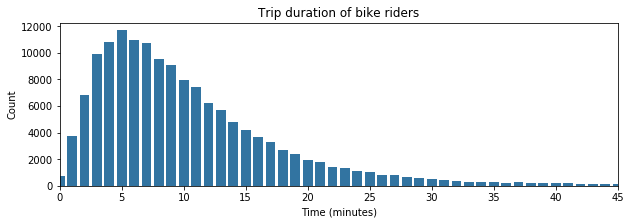

In [22]:
plt.figure(figsize=(10,3))
base_color= sb.color_palette()[0]
sb.countplot(data= df, x='duration_min', color=base_color)
plt.xlim((0,40))
plt.title('Trip duration of bike riders')
plt.ylabel('Count')
plt.xlabel('Time (minutes)')
plt.xticks([0,5,10,15,20,25,30,35,40,45],[0,5,10,15,20,25,30,35,40,45]);

In [23]:
print("The maximum duration of bike riding (mins): ", df.duration_min.max())
print("The minimum duration of bike riding (mins): ", df.duration_min.min())

The maximum duration of bike riding (mins):  15202
The minimum duration of bike riding (mins):  1


As seen from the plot above. The most riders trip duration is about 5 minutes. Then, the plot skews to the right as the trip duration increases. However, there is a maximum rider who rode 15202 mins (253 hours). Probably, it is because he/she rented the bike for a couple of days as his/her transportation method. This, interpretation is possible for all riders rode more than the usual trip duration. 

### Day distribution of bike riders

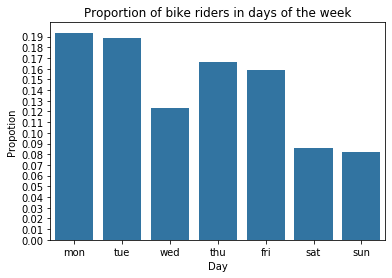

In [24]:
total= df.shape[0]
max_day= df.day.value_counts().max()
max_prop= max_day/total
ticks= np.arange(0, max_prop, 0.01)
ticks_string= ['{:0.2f}'.format(v) for v in ticks]

sb.countplot(data= df, x='day', order= days, color= base_color)
plt.xlabel('Day')
plt.ylabel('Propotion')
plt.yticks(ticks * total, ticks_string)
plt.title('Proportion of bike riders in days of the week');

In [25]:
df[df.duration_min>=60]['duration_min'].count()
100*(df[df.duration_min>=60]['duration_min'].count()/df['duration_min'].count())

1.1192389175360755

From the the above plot, we can see about 20% of of bike riders rent bikes on Monday and Tuesday. While the least proportion is on Sunday and Saturday where 8% of the total number rent bikes. In general, the majority of bike riders rent bike on weekdays not weekends as I expected. One reason for this, is maybe some ride a bike to go to work, or nearest public transport station.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  From the duration in minutes plot, **most of the bike rideres trip is 5 minutes**. This doesn't mean that we won't find riders rent a bike for more than 60 minutes. In fact, 1.1% of the riders rented a bike for more than 1 hour (60 mins). Thus, we have to **expect the absence a minor number of bikes**. Since some people rent it for hours and maybe days.

> The time line of start and end date **doesn't indicate a pattern in the data**, but from the histogram we can see that the two plots are identical. As stated, this **means that riders rent and return the bike within the same day**.

> While on the user type, I **expected more subscribers than normal customers, but there is not much difference between them**.

> Finally, expect to have the majority of bike renters on weekdays not weekends.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The only unusual thing is that there is a bike rider who rented a bike for about 10 days. The data remained the same, I have seperated the date and time in start_time end_time columns. In addition, I have created 2 new columns to indicate weekdays and days of the week. Also, I converted the duration from seconds to minutes. The reason because these modifications is I believe they will make the analysis easier.

## Bivariate Exploration

### Does user type affects the trip duration?
In contrast, can we predict from subscribers to ride a bike for a longer time? or there isn't a relation between the user type and trip duration. Since the proportion of subscribers and customers is almost the same, we can inspect it.

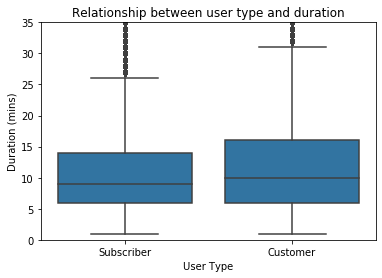

In [26]:
sb.boxplot(data = df, x = 'user_type', y = 'duration_min', order= ['Subscriber','Customer'], color= base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (mins)')
plt.ylim(0,35) #To zoom in, there are values over 1000 minutes
plt.title('Relationship between user type and duration');

Even though 52% of the riders are subscribed, yet customers do spend a little more time on their trip than subscribers. Maybe subscibers take less time because they got used to ride the bike? or the distance to destination is short which made them subscribe? This need further investigation and more infromation that we don't have currently.

### Relation between day of the week and user type

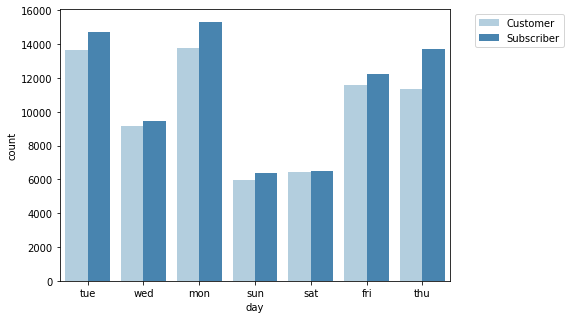

In [27]:
plt.figure(figsize= (7,5))
sb.countplot(data= df, hue='user_type', x= 'day', palette= 'Blues')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

It seems like we have more subscribers each day than customers.

### Trip duration and weekdays

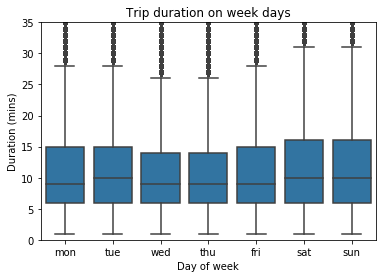

In [28]:
sb.boxplot(data= df, x='day', y='duration_min', color= base_color, order= days)
plt.ylim(0,35)
plt.xlabel('Day of week')
plt.ylabel('Duration (mins)')
plt.title('Trip duration on week days');

The median of duration is almost the same during all days of the week. However, people who ride at weekends (Saturday and Sunday) tend to spend a a little more time riding a bike than people who rent on weekdays.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Custromers' trip is more likely to take more time than subscribers. Maybe because they are beginners or hasn't gotten used to ride a bike.

> Bike riders who rent on weekends tend to spend a couple more minutes in their trip than riders who rent on weekdays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There isn't a strong relationship between the features. 

## Multivariate Exploration

C:\Users\mohan\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


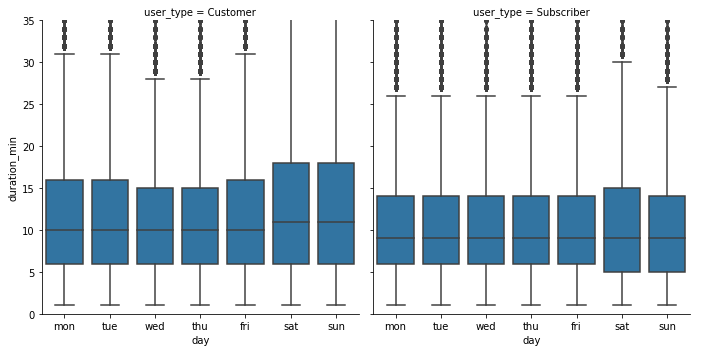

In [29]:
g= sb.FacetGrid(data= df, col= 'user_type', size=5)
g.map(sb.boxplot, 'day', 'duration_min', order= days)
plt.ylim(0,35)
g.add_legend()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Customers on weekends tend to spend more time than subscirbers or any other days. Also, the trip duration of subscribers is consistent on weekdays, which may indicate that they are willing to use a bike every day to go to the same destination.

### Were there any interesting or surprising interactions between features?

> We may say that people subscribe when they are planning to use the bike daily.

## References
- [Pie chart documentation](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html)
- [Rounding float in a series](https://www.geeksforgeeks.org/python-pandas-dataframe-round/#:~:text=Pandas%20is%20one%20of%20those,different%20columns%20by%20different%20places.)
- [.dt.dayofweek number encodings](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html#pandas.Series.dt.dayofweek)
- [Weekends and weekdays in San Francisco](https://www.caltrain.com/schedules.html)
- [Extracting weekday from a pd.Series](https://stackoverflow.com/questions/32278728/convert-dataframe-date-row-to-a-weekend-not-weekend-value/32280195)
- [plt.figure documentation](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.figure.html)

In [30]:
df.to_csv('Bike Riders cleaned data 2019-12.csv', index=False)